In [272]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [273]:
df_train= pd.read_csv("../Data/train.csv")
df_test= pd.read_csv("../Data/test.csv")

In [274]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [275]:
df_train.columns

Index(['TransactionNumber', 'UserID', 'Age', 'Gender', 'Occupation',
       'EducationLevel', 'MaritalStatus', 'NumDependents', 'Income',
       'Expenditure', 'GiftsTransaction', 'TransactionDate', 'TransactionTime',
       'TransactionAmount', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'EmailDomain', 'Terrorism', 'UserTenure', 'IsFraud'],
      dtype='object')

## Data Analysis

#### Checking labels distribution

<Axes: ylabel='count'>

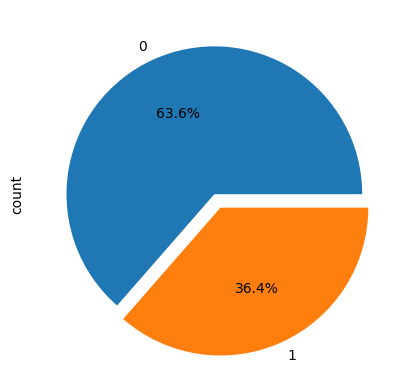

In [276]:
df_train['IsFraud'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

36.4% Fraud and 63.6% not Fraud.

#### Checking amount unit

In [277]:
#df_train['transaction_units'] = df_train['TransactionAmount'].str.extract(r'([^\d\s.]+)')
#df_train['income_units'] = df_train['Income'].str.extract(r'([^\d\s.]+)')
#df_train['expend_units'] = df_train['Expenditure'].str.extract(r'([^\d\s.]+)')
#print(df_train['transaction_units'].unique())
#print(df_train['income_units'].unique())
#print(df_train['expend_units'].unique())

#### Checking gender type

In [278]:
print(df_train['Gender'].unique())
print(df_test['Gender'].unique())

['Female' 'Male' 'he' 'isnotfemale' 'fem' 'she' 'man' 'woman' 'isnotmale']
['man' 'Male' 'Female' 'he' 'fem' 'isnotfemale' 'she' 'isnotmale' 'woman']


In [279]:
def unify_gender(gender):
    if gender in ['Female', 'fem', 'she', 'woman']:
        return 'F'
    elif gender in ['Male', 'he', 'man']:
        return 'M'
    elif gender in ['isnotfemale', 'isnotmale']:
        return 'O'
    else:
        return 'unknown'

df_train['Gender'] = df_train['Gender'].apply(unify_gender)

print(df_train['Gender'].unique())

['F' 'M' 'O']


In [280]:
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_train['Gender'].unique()

array([0, 1, 2])

In [281]:
df_test['Gender'] = df_test['Gender'].apply(unify_gender)
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test.Gender.unique()

array([1, 0, 2])

#### Checking age

In [282]:
df_train[(df_train['Age'] < 0)].value_counts()

TransactionNumber  UserID  Age  Gender  Occupation    EducationLevel  MaritalStatus  NumDependents  Income         Expenditure    GiftsTransaction  TransactionDate  TransactionTime  TransactionAmount  MerchantID  TransactionType  TransactionLocation  DeviceType  Latitude    Longitude   EmailDomain                Terrorism  UserTenure  IsFraud
1                  156     -38  0       Professional  High School     Single         2              39760.51 AUD   20149.52 AUD   2857.22 GBP       2023-06-14       07:39:53         252.72 AUD         M001        Purchase         Melbourne            Mobile      -31.840233  145.612793  johnsonnicole@gmail.com    True       67          0          1
10179              3122    -43  0       Student       Bachelor        Single         4              53064.8 AUD    24295.44 AUD   1185.82 GBP       2023-05-24       10:38:30         AU$ 39.37          M002        Transfer         melbourne            Tablet      -25.042261  117.793221  bwright@gmail.com 

In [283]:
df_train['Age'] = df_train['Age'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

In [284]:
df_train.loc[(df_train['Age'] > 100), 'Age'] = -1
df_train.Age.value_counts()

Age
-1     858
 18    554
 32    453
 39    432
 36    407
 35    402
 33    398
 34    394
 40    389
 31    389
 37    361
 30    349
 38    331
 28    317
 27    312
 42    297
 26    290
 43    269
 41    269
 24    265
 44    264
 29    258
 21    230
 25    227
 23    220
 47    212
 45    197
 46    194
 48    182
 49    163
 22    151
 50    149
 20    144
 19    115
 51     94
 52     69
 54     67
 53     62
 55     55
 57     31
 60     25
 61     24
 59     20
 56     19
 58     16
 62     13
 68     10
 66     10
 63      6
 64      3
Name: count, dtype: int64

In [285]:
df_test['Age'] = df_test['Age'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)
df_test.loc[(df_test['Age'] > 100), 'Age'] = -1
df_test.Age.value_counts()

Age
-1     610
 18    421
 32    309
 36    279
 31    267
 40    264
 39    260
 37    255
 34    254
 33    243
 38    240
 30    238
 28    218
 35    213
 27    208
 42    207
 41    201
 26    200
 29    188
 24    188
 43    173
 25    150
 21    147
 47    141
 23    137
 44    137
 45    127
 46    120
 48    118
 22    116
 49     99
 20     91
 50     82
 19     76
 51     65
 54     43
 52     39
 53     38
 55     28
 57     23
 60     22
 56     22
 59     11
 58     11
 62     10
 66      9
 63      5
 61      4
 67      3
 68      1
 64      1
Name: count, dtype: int64

#### Handling Terrorism

In [286]:
df_train['Terrorism'] = df_train['Terrorism'].astype(int)

#### Handling TransactionType

In [287]:
df_train['TransactionType'].unique()

array(['Withdrawal', 'Purchase', 'Payment', 'Transfer'], dtype=object)

In [288]:
df_train['TransactionType'] = label_encoder.fit_transform(df_train['TransactionType'])
df_train['TransactionType'].unique()

array([3, 1, 0, 2])

#### Handling TransactionLocation

In [289]:
df_train['TransactionLocation'].unique()

array(['Adelaide', 'Canberra', 'Brisbane', 'Darwin', 'MLB', 'Mel',
       'Sydney', 'Hobart', 'HBT', 'Melb', 'Perth', 'Melbourne',
       'canberra', 'brisbane', 'melbourne', 'Bne', 'perth', 'DRW',
       'Melburn', 'hobart', 'darwin', 'Adelaide City', 'Adl', 'CBR',
       'PTH', 'Cbr', 'Drw', 'sydney', 'BNE', 'Pth', 'SYD', 'Hbt', 'adl',
       'Syd'], dtype=object)

In [290]:
def unify_location(location):
    if location in ['Adelaide', 'Adelaide City', 'Adl', 'adl']:
        return 'ADL'
    elif location in ['Canberra', 'canberra', 'CBR' ,'Cbr']:
        return 'CBR'
    elif location in ['Brisbane', 'brisbane', 'Bne', 'BNE']:
        return 'BNE'
    elif location in ['Darwin', 'DRW', 'darwin', 'Drw']:
        return 'DRW'
    elif location in ['MLB', 'Mel', 'Melb', 'Melbourne', 'melbourne', 'Melburn']:
        return 'MLB'
    elif location in ['Sydney', 'sydney', 'SYD', 'Syd']:
        return 'SYD'
    elif location in ['Hobart', 'HBT', 'hobart', 'Hbt']:
        return 'HBT'
    elif location in ['Perth', 'perth', 'PTH', 'Pth']:
        return 'PTH'
    else:
        return 'unknown'

df_train['TransactionLocation'] = df_train['TransactionLocation'].apply(unify_location)
df_train['TransactionLocation'].unique()

array(['ADL', 'CBR', 'BNE', 'DRW', 'MLB', 'SYD', 'HBT', 'PTH'],
      dtype=object)

In [291]:
df_train['TransactionLocation'] = label_encoder.fit_transform(df_train['TransactionLocation'])
df_train['TransactionLocation'].unique()

array([0, 2, 1, 3, 5, 7, 4, 6])

#### Education level

In [292]:
df_train['EducationLevel'].unique()

array(['Bachelor', 'High School', 'Master', 'PhD'], dtype=object)

In [293]:
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df_train['EducationLevel'] = pd.Categorical(df_train['EducationLevel'], categories= education_order, ordered=True)
df_train['EducationLevel'] = df_train['EducationLevel'].cat.codes
df_train['EducationLevel'].unique()

array([1, 0, 2, 3], dtype=int8)

#### Occupation

In [294]:
df_train['Occupation'].unique()

array(['Professional', 'Student', 'Unemployed', 'Retired'], dtype=object)

In [295]:
occupation_order = ['Student', 'Unemployed', 'Professional', 'Retired']
df_train['Occupation'] = pd.Categorical(df_train['Occupation'], categories= occupation_order, ordered=True)
df_train['Occupation'] = df_train['Occupation'].cat.codes
df_train['Occupation'].unique()

array([2, 0, 1, 3], dtype=int8)

#### Marital Status

In [296]:
df_train['MaritalStatus'].unique()

array(['Widowed', 'Married', 'Single', 'Divorced'], dtype=object)

In [297]:
marital_order = ['Single', 'Married', 'Divorced', 'Widowed']
df_train['MaritalStatus'] = pd.Categorical(df_train['MaritalStatus'], categories= marital_order, ordered=True)
df_train['MaritalStatus'] = df_train['MaritalStatus'].cat.codes
df_train['MaritalStatus'].unique()

array([3, 1, 0, 2], dtype=int8)

#### Device type

In [298]:
df_train['DeviceType'].unique()

array(['Mobile', 'iphone 15', 'Tablet', 'Desktop', 'android',
       'smartphone', 'mob', 'galaxys7'], dtype=object)

In [299]:
df_train.DeviceType = df_train.DeviceType.map({'Mobile': 'mobile', 'Desktop': 'computer', 'Tablet': 'tablet', 
                      'galaxys7': 'mobile', 'iphone 15': 'mobile', 'android': 'mobile',
                     'smartphone': 'mobile', 'mob': 'mobile'})

df_train.DeviceType.isnull().sum()

0

In [300]:
df_train.DeviceType = df_train.DeviceType.map({'mobile': 0, 'computer': 1, 'tablet': 2})
df_train.DeviceType.unique()

array([0, 2, 1])

#### Drop not important features

In [301]:
df_train.drop(['TransactionDate','TransactionTime','MerchantID','EmailDomain', 'Latitude', 'Longitude'],axis=1,inplace=True)

In [306]:
df_cleaned = pd.read_csv('../Data/Kevin_Shen/train_cleaned.csv')
df_train['Income'] = df_cleaned['Income']
df_train['Expenditure'] = df_cleaned['Expenditure']
df_train['GiftsTransaction'] = df_cleaned['GiftsTransaction']
df_train['TransactionAmount'] = df_cleaned['TransactionAmount']
df_train.to_csv('../Data/train_final_Judy.csv', index=False)

## Modeling

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

In [307]:
train_judy = pd.read_csv('../Data/train_final_Judy.csv')
train_judy.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,GiftsTransaction,TransactionAmount,TransactionType,TransactionLocation,DeviceType,Terrorism,UserTenure,IsFraud
0,8765,70,37,0,2,1,3,3,28884.43,14610.610,2100.02,258.140,3,0,0,0,113,1
1,9645,3386,34,1,0,0,1,4,54919.07,39169.490,9939.42,34.940,3,2,0,0,104,1
2,1145,2971,25,1,1,2,1,2,74728.57,55873.760,2299.70,323.820,1,1,0,0,105,0
3,15308,2925,25,1,2,0,1,3,55712.62,35859.616,4335.70,12.996,1,3,0,0,70,1
4,14967,2339,38,1,2,0,0,4,53004.70,17440.408,4763.48,456.300,3,5,2,0,27,0


#### Correlation analysis

                     Income  Expenditure  GiftsTransaction  TransactionAmount
Income             1.000000     0.833622          0.431099           0.007390
Expenditure        0.833622     1.000000          0.355729           0.005689
GiftsTransaction   0.431099     0.355729          1.000000          -0.005352
TransactionAmount  0.007390     0.005689         -0.005352           1.000000


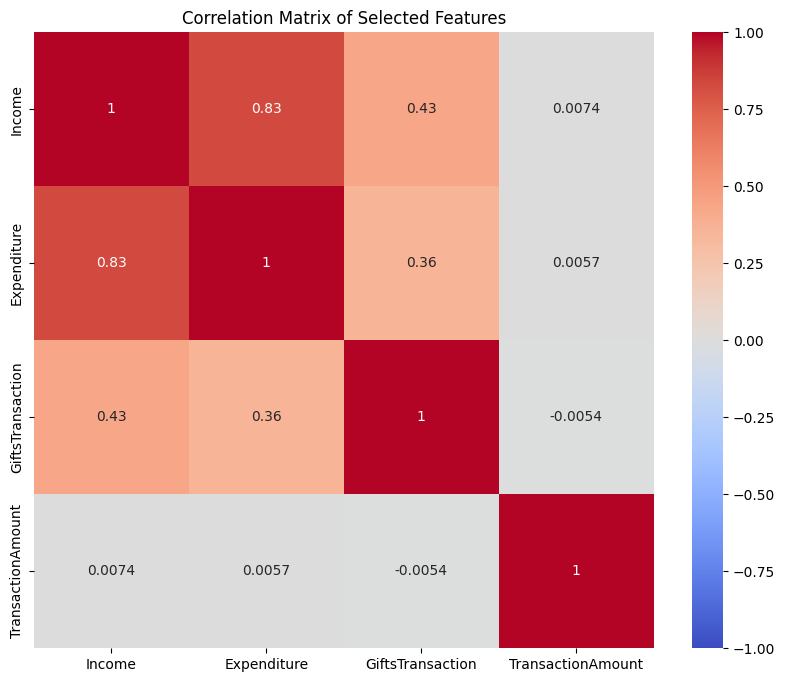

In [309]:
columns_of_interest = ['Income', 'Expenditure', 'GiftsTransaction', 'TransactionAmount']
data_of_interest = train_judy[columns_of_interest]

correlation_matrix = data_of_interest.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### Random Forest

In [327]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [328]:
X = train_judy.drop(columns=['IsFraud'])
y = train_judy['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[1322   46]
 [ 357  469]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1368
           1       0.91      0.57      0.70       826

    accuracy                           0.82      2194
   macro avg       0.85      0.77      0.78      2194
weighted avg       0.83      0.82      0.80      2194

AUC-ROC: 0.8782089404301715


In [329]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print evaluation metrics
print(classification_report(y_test, y_pred))